# ***PREMIER LEAGUE***

![](https://download.logo.wine/logo/Premier_League/Premier_League-Logo.wine.png)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data visualization library
import seaborn as sns
import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/premier-league/stats.csv
/kaggle/input/premier-league/results.csv


In [2]:
stats = pd.read_csv('../input/premier-league/stats.csv')
stats

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Huddersfield Town,9.0,19.0,28.0,62.0,3.0,362.0,109.0,8.0,5.0,...,765.0,165.0,22619.0,21.0,6.0,416.0,2.0,31.0,24.0,2017-2018
236,Swansea City,8.0,21.0,28.0,51.0,1.0,338.0,103.0,8.0,3.0,...,694.0,150.0,22775.0,26.0,1.0,439.0,3.0,44.0,15.0,2017-2018
237,Southampton,7.0,16.0,37.0,63.0,2.0,450.0,145.0,15.0,7.0,...,800.0,227.0,24639.0,37.0,4.0,379.0,1.0,29.0,13.0,2017-2018
238,Stoke City,7.0,19.0,35.0,62.0,1.0,384.0,132.0,8.0,8.0,...,598.0,136.0,20368.0,33.0,3.0,402.0,0.0,27.0,14.0,2017-2018


In [3]:
results = pd.read_csv('../input/premier-league/results.csv')
results

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007
...,...,...,...,...,...,...
4555,Newcastle United,Chelsea,3.0,0.0,H,2017-2018
4556,Southampton,Manchester City,0.0,1.0,A,2017-2018
4557,Swansea City,Stoke City,1.0,2.0,A,2017-2018
4558,Tottenham Hotspur,Leicester City,5.0,4.0,H,2017-2018


In [4]:
results.season.unique()

array(['2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011',
       '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016',
       '2016-2017', '2017-2018'], dtype=object)

# ANALYZING SEASON 2014-2015

In [5]:
res = results[results.season == '2014-2015']
stat = stats[stats.season == '2014-2015']

In [6]:
res

,home_team,away_team,home_goals,away_goals,result,season
3040,Manchester United,Swansea City,1.0,2.0,A,2014-2015
3041,Leicester City,Everton,2.0,2.0,D,2014-2015
3042,Queens Park Rangers,Hull City,0.0,1.0,A,2014-2015
3043,Stoke City,Aston Villa,0.0,1.0,A,2014-2015
3044,West Bromwich Albion,Sunderland,2.0,2.0,D,2014-2015
...,...,...,...,...,...,...
3415,Hull City,Manchester United,0.0,0.0,D,2014-2015
3416,Leicester City,Queens Park Rangers,5.0,1.0,H,2014-2015
3417,Manchester City,Southampton,2.0,0.0,H,2014-2015
3418,Newcastle United,West Ham United,2.0,0.0,H,2014-2015


In [7]:
stat

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
160,Chelsea,26.0,3.0,73.0,73.0,4.0,564.0,210.0,15.0,10.0,...,682.0,226.0,27861.0,40.0,2.0,476.0,0.0,73.0,13.0,2014-2015
161,Manchester City,24.0,7.0,83.0,77.0,2.0,670.0,229.0,18.0,5.0,...,795.0,277.0,29652.0,42.0,1.0,546.0,1.0,52.0,31.0,2014-2015
162,Arsenal,22.0,7.0,71.0,68.0,2.0,610.0,227.0,13.0,10.0,...,866.0,254.0,29045.0,51.0,2.0,476.0,0.0,76.0,13.0,2014-2015
163,Manchester United,20.0,8.0,62.0,64.0,5.0,512.0,180.0,11.0,12.0,...,908.0,214.0,29044.0,43.0,5.0,393.0,1.0,33.0,7.0,2014-2015
164,Tottenham Hotspur,19.0,12.0,58.0,79.0,4.0,527.0,171.0,11.0,8.0,...,742.0,224.0,27495.0,39.0,1.0,552.0,1.0,51.0,28.0,2014-2015
165,Liverpool,18.0,12.0,52.0,66.0,3.0,590.0,192.0,12.0,5.0,...,638.0,198.0,27353.0,34.0,3.0,468.0,2.0,38.0,41.0,2014-2015
166,Southampton,18.0,14.0,54.0,57.0,3.0,509.0,169.0,17.0,3.0,...,952.0,208.0,25815.0,44.0,4.0,422.0,0.0,50.0,15.0,2014-2015
167,Swansea City,16.0,14.0,46.0,48.0,5.0,426.0,147.0,12.0,5.0,...,634.0,151.0,25645.0,35.0,3.0,363.0,0.0,91.0,31.0,2014-2015
168,Stoke City,15.0,14.0,48.0,82.0,1.0,500.0,136.0,9.0,14.0,...,887.0,195.0,23427.0,32.0,3.0,428.0,0.0,68.0,12.0,2014-2015
169,Crystal Palace,13.0,16.0,47.0,63.0,4.0,441.0,139.0,14.0,10.0,...,834.0,209.0,20386.0,25.0,7.0,325.0,2.0,77.0,9.0,2014-2015


# *Columns*

In [8]:
stat.columns

Index(['team', 'wins', 'losses', 'goals', 'total_yel_card', 'total_red_card',
       'total_scoring_att', 'ontarget_scoring_att', 'hit_woodwork',
       'att_hd_goal', 'att_pen_goal', 'att_freekick_goal', 'att_ibox_goal',
       'att_obox_goal', 'goal_fastbreak', 'total_offside', 'clean_sheet',
       'goals_conceded', 'saves', 'outfielder_block', 'interception',
       'total_tackle', 'last_man_tackle', 'total_clearance', 'head_clearance',
       'own_goals', 'penalty_conceded', 'pen_goals_conceded', 'total_pass',
       'total_through_ball', 'total_long_balls', 'backward_pass',
       'total_cross', 'corner_taken', 'touches', 'big_chance_missed',
       'clearance_off_line', 'dispossessed', 'penalty_save',
       'total_high_claim', 'punches', 'season'],
      dtype='object')

In [9]:
stat['draws'] = 38-(stat.wins + stats.losses)
# stat

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
label = stat.team.tolist()
x = np.arange(len(label))

# *Wins,Draws,Loss Distribution of Teams*

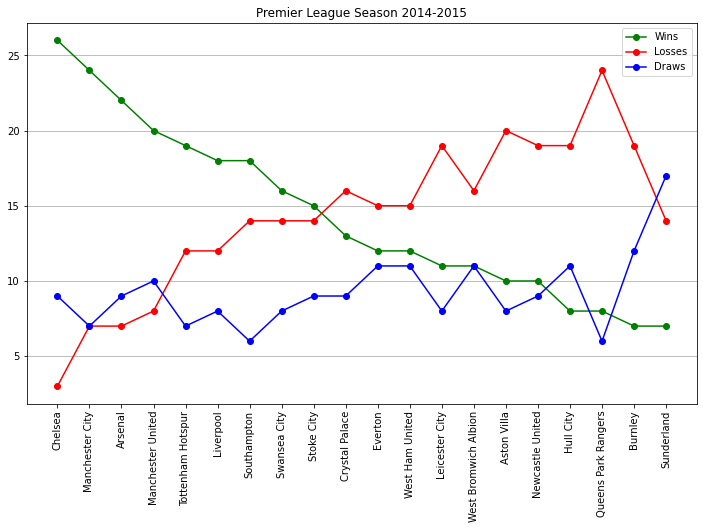

In [11]:
fig,ax = plt.subplots(figsize=(12,7))
ax.plot(x,stat.wins, '-o', color='green', label='Wins')
ax.plot(x,stat.losses,'-o', color='red', label='Losses')
ax.plot(x,stat.draws,'-o', color='blue', label='Draws')
ax.set_xticks(x)
ax.set_xticklabels(label)
plt.xticks(rotation=90)
ax.set_title('Premier League Season 2014-2015')
ax.legend()
plt.grid(axis='y')
plt.show()

# *WINNERS CHELSEA* 

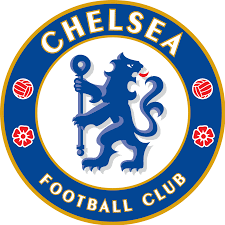

In [12]:
che = stat[stat.team =='Chelsea']

# **Percentage Distribution of Results**

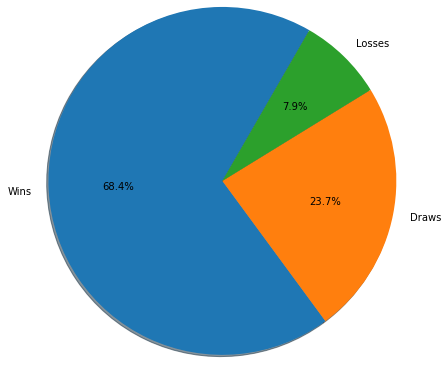

In [13]:
pie_label = ['Wins', 'Draws', 'Losses']
data = [che.wins.values[0],che.draws.values[0],che.losses.values[0]]
plt.pie(data, labels = pie_label,autopct='%1.1f%%', shadow=True, startangle=60, radius=2)
plt.show()

In [14]:
res_che = res[(res.home_team == 'Chelsea')|(res.away_team=='Chelsea')]

# *MATCHWEEK WISE ANALYSIS - CHELSEA*

In [15]:
x_ = np.arange(len(res_che))

In [16]:
goals, conceded = [], []
for i,row in res_che.iterrows():
    if row.home_team == 'Chelsea':
        goals.append(row.home_goals)
        conceded.append(row.away_goals)
    else:
        goals.append(row.away_goals)
        conceded.append(row.home_goals)

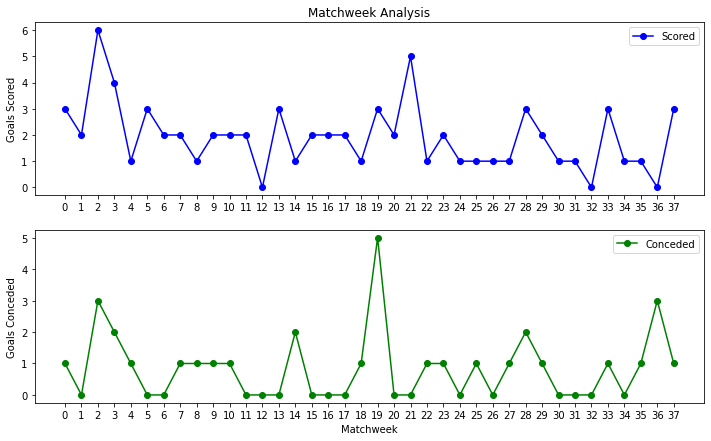

In [17]:
f,a = plt.subplots(2,1,figsize=(12,7))
a[0].plot(x_,goals,'-o',color='blue', label='Scored')
a[0].set_xticks(x_)
a[0].set_ylabel('Goals Scored')
a[0].legend()
a[0].set_title('Matchweek Analysis')
a[1].plot(x_,conceded,'-o',color='green',label='Conceded')
a[1].set_xticks(x_)
a[1].set_ylabel('Goals Conceded')
a[1].set_xlabel('Matchweek')
a[1].legend()

plt.show()

# *TOP 6 ANALYSIS*

1. CHELSEA
2. MANCHESTER CITY
3. ARSENAL
4. MANCHESTER UNITED
5. TOTTENHAM HOTSPUR
6. LIVERPOOL

In [18]:
top6 = stat[:6]

# ATTACKING PROWESS

In [19]:
xlabel = top6.team.tolist()
sidex = np.arange(len(xlabel))

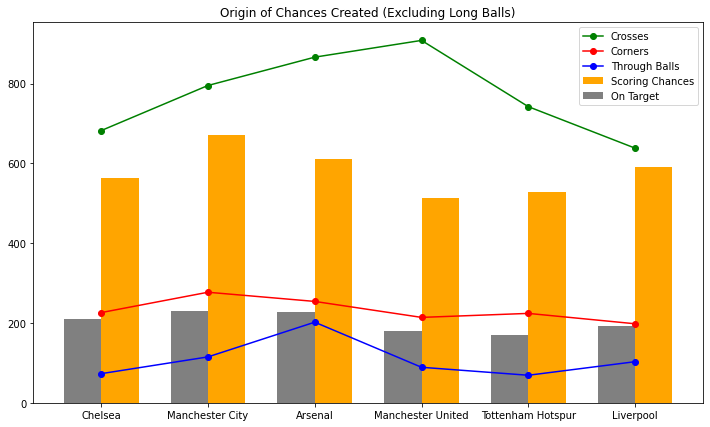

In [20]:
figure, axis = plt.subplots(figsize=(12,7))
axis.bar(sidex+0.35/2, top6.total_scoring_att,0.35, color='orange',label='Scoring Chances')
axis.bar(sidex-0.35/2, top6.ontarget_scoring_att, 0.35, color='grey',label='On Target')
axis.plot(sidex, top6.total_cross,'-o', color='green',label='Crosses')
axis.plot(sidex, top6.corner_taken,'-o', color='red',label='Corners')
axis.plot(sidex, top6.total_through_ball,'-o', color='blue',label='Through Balls')
axis.set_xticks(sidex)
axis.set_xticklabels(xlabel)
axis.legend()
axis.set_title('Origin of Chances Created (Excluding Long Balls)')
plt.show()

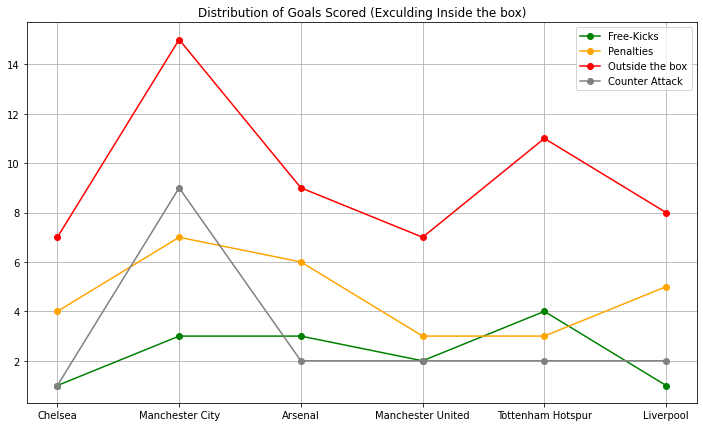

In [21]:
p,q = plt.subplots(figsize=(12,7))
q.plot(sidex, top6.att_freekick_goal,'-o', color='green',label='Free-Kicks')
q.plot(sidex, top6.att_pen_goal,'-o', color='orange',label='Penalties')
q.plot(sidex, top6.att_obox_goal,'-o', color='red',label='Outside the box')
q.plot(sidex, top6.goal_fastbreak,'-o', color='grey',label='Counter Attack')
q.set_xticks(sidex)
q.set_xticklabels(xlabel)
q.legend()
q.set_title('Distribution of Goals Scored (Exculding Inside the box)')
plt.grid()
plt.show()


# **DEFENSIVE ANALYSIS**

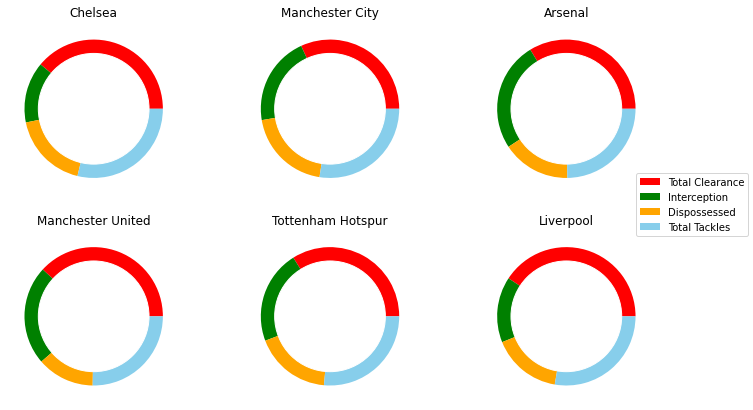

In [22]:
names = ['Total Clearance','Interception','Dispossessed','Total Tackles']
listed = top6.team.tolist()
fig = plt.figure(figsize=(12,7))
for teams,num in zip(listed, range(1,7)):
    temp = top6[top6.team == teams]
    size=[temp.total_clearance.values[0],temp.interception.values[0],
          temp.dispossessed.values[0], temp.total_tackle.values[0]]
    plt.subplot(2,3,num)
    m = plt.Circle((0,0),0.8,color='White')
    plt.pie(size, colors=['red','green','orange','skyblue'])
    p=plt.gcf()
    p.gca().add_artist(m)
    plt.title(teams)
plt.figlegend(names, loc='center right')
plt.show()